<a href="https://colab.research.google.com/github/crystalclcm/APA-project/blob/main/APA_Poster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install nltk


In [3]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
file_path = '/content/drive/MyDrive/Openfood.tsv'

In [6]:

import pandas as pd

# Correct file path
file_path = '/content/drive/MyDrive/Openfood.tsv'

# Load the dataset
df = pd.read_csv(file_path, sep='\t', compression='infer', low_memory=True)
print(f"Original dataset shape: {df.shape}")

# Sample 250,000 rows
sample_size = 250_000
sample_df = df.sample(n=sample_size, random_state=42)

# Save the sample back to Google Drive
output_path = '/content/drive/MyDrive/Openfood_sample_250k.tsv'
sample_df.to_csv(output_path, sep='\t', index=False)
print(f"Sample saved to: {output_path}")


/tmp/ipython-input-685764851.py:7: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='\t', compression='infer', low_memory=True)


Original dataset shape: (356027, 163)
Sample saved to: /content/drive/MyDrive/Openfood_sample_250k.tsv


In [7]:
!ls '/content/drive/MyDrive'

'30A BW lease agreement (first half).pdf'
'30A BW lease agreement (second half).pdf'
'36 st. fintan villas lease agreement (part 1).pdf'
'36 st.fintan villas lease agreement (part 2).pdf'
'36 st. fintan villas letter of engagement.pdf'
'68 st. fintan villas letter of engagement.pdf'
'6 ferndale road letter of engagement.pdf'
'BM Listing.gsheet'
'BM Listing.xlsx'
'Bus Analytics - Crystal Matticks CV 2024.gdoc'
'BW Contact Listing.gsheet'
'BW Contact Listing.xlsx'
'CA1 BDM.drawio'
'CA-1 Business Modelling Crystal Matticks.gdoc'
'Car Spaces  Byrne Moore.gsheet'
'Car Spaces  Byrne Moore.xls'
'Colab Notebooks'
'conall cv Updated (1).gdoc'
'conall cv Updated (1).pdf'
'Context Diagram.drawio'
'Copy of Copy of Untitled Diagram.drawio'
'Copy of Crystal Matticks CV 2024 (1).docx'
'Copy of Crystal Matticks CV 2024 (2).docx'
'Copy of Crystal Matticks CV 2024.docx'
'Copy of Crystal Matticks CV 2024.gdoc'
'Copy of Crystal Matticks CV Updated.docx'
'Copy of Crystal Matticks CV Updated.gdoc'
'Copy of 

In [8]:
sample_df.to_csv(output_path + '.gz', sep='\t', index=False, compression='gzip')

In [9]:
print(f"Sample size: {len(sample_df)} rows")

Sample size: 250000 rows


In [10]:
file_path = '/content/drive/MyDrive/Openfood_sample_250k.tsv'  # Use your sampled file

In [11]:
import pandas as pd
df = pd.read_csv(file_path, sep='\t', low_memory=True)
print("Rows loaded:", len(df))


/tmp/ipython-input-3817173702.py:2: DtypeWarning: Columns (3,5,27,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='\t', low_memory=True)


Rows loaded: 250000


In [12]:
cols = [
    'product_name',
    'generic_name',
    'ingredients_text',
    'energy_100g',
    'sugars_100g',
    'saturated-fat_100g'
]
df = df[cols]


In [13]:
df['text'] = (
    df['product_name'].fillna('') + ' ' +
    df['generic_name'].fillna('') + ' ' +
    df['ingredients_text'].fillna('')
)


In [16]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
import re
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')  # Fix for LookupError

def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = nltk.word_tokenize(text)
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(clean_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [18]:
healthy = (
    (df['sugars_100g'] < 5) &
    (df['saturated-fat_100g'] < 1.5) &
    (df['energy_100g'] < 150)
)

unhealthy = (
    (df['sugars_100g'] > 15) |
    (df['saturated-fat_100g'] > 5) |
    (df['energy_100g'] > 300)
)

df = df[healthy | unhealthy]
df['label'] = healthy.astype(int)
print(df['label'].value_counts())


label
0    165100
1     10566
Name: count, dtype: int64


In [19]:
print(df[df['label']==1].head(3)[['product_name','sugars_100g','saturated-fat_100g','energy_100g']])
print(df[df['label']==0].head(3)[['product_name','sugars_100g','saturated-fat_100g','energy_100g']])


        product_name  sugars_100g  saturated-fat_100g  energy_100g
17  Water  Chestnuts         1.63                 0.0        138.0
44      Tomato Sauce         3.28                 0.0        138.0
48     Chili Peppers         3.33                 0.0        138.0
                                        product_name  sugars_100g  \
1         Mexican Style Blend Finely Shredded Cheese         0.00   
2            Pâte à Tarte Feuilletée Tout Simplement         0.70   
6  Lehi Valley Trading Co, Roasted & Salted Mediu...         6.67   

   saturated-fat_100g  energy_100g  
1               17.86       1494.0  
2               13.80       1516.0  
6                8.33       2372.0  


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'], df['label'],
    test_size=0.2, random_state=42, stratify=df['label']
)


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=10000)  # smaller for speed
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)

pred = model.predict(X_test_tfidf)
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99     33021
           1       0.92      0.63      0.75      2113

    accuracy                           0.97     35134
   macro avg       0.95      0.81      0.87     35134
weighted avg       0.97      0.97      0.97     35134



In [23]:
#improve healthy recall
!pip install imbalanced-learn

In [24]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Oversample the minority class (healthy)
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train_tfidf, y_train)

# ✅ Retrain Logistic Regression on balanced data
model_balanced = LogisticRegression(max_iter=300)
model_balanced.fit(X_resampled, y_resampled)

# ✅ Predict on test set
pred_balanced = model_balanced.predict(X_test_tfidf)

# ✅ Classification report
print("=== Logistic Regression with Oversampling ===")


=== Logistic Regression with Oversampling ===


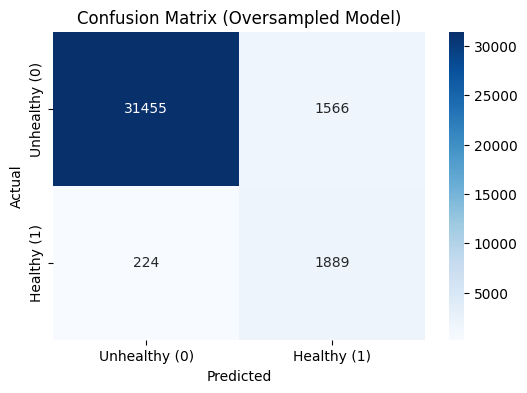

In [25]:
cm = confusion_matrix(y_test, pred_balanced)
labels = ["Unhealthy (0)", "Healthy (1)"]

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix (Oversampled Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


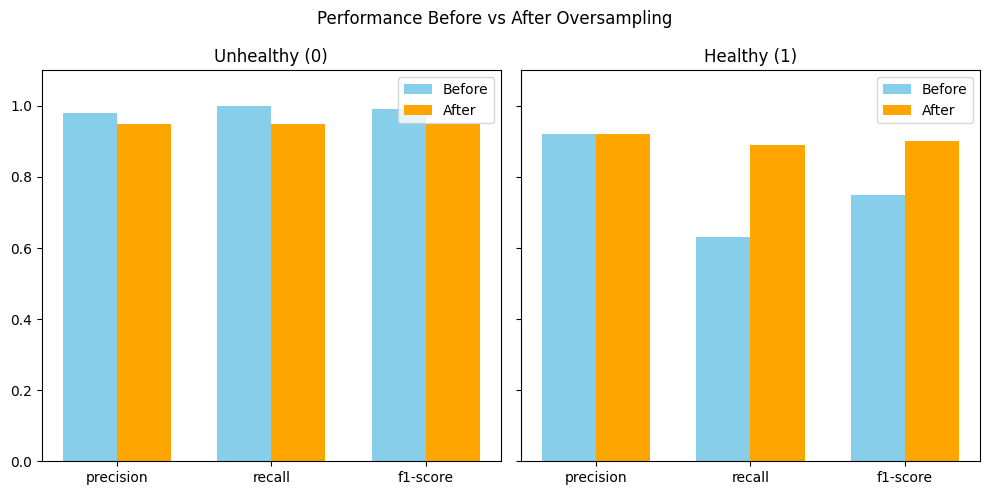

In [26]:

import matplotlib.pyplot as plt
import numpy as np

# Replace these with your actual metrics from classification_report
# BEFORE oversampling
report_before = {
    '0': {'precision': 0.98, 'recall': 1.00, 'f1-score': 0.99},
    '1': {'precision': 0.92, 'recall': 0.63, 'f1-score': 0.75}
}

# AFTER oversampling
report_after = {
    '0': {'precision': 0.95, 'recall': 0.95, 'f1-score': 0.95},
    '1': {'precision': 0.92, 'recall': 0.89, 'f1-score': 0.90}
}

# Metrics and classes
metrics = ['precision', 'recall', 'f1-score']
classes = ['Unhealthy (0)', 'Healthy (1)']
x = np.arange(len(metrics))
width = 0.35

fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

for i, cls in enumerate(['0', '1']):
    before_vals = [report_before[cls][m] for m in metrics]
    after_vals = [report_after[cls][m] for m in metrics]

    axes[i].bar(x - width/2, before_vals, width, label='Before', color='skyblue')
    axes[i].bar(x + width/2, after_vals, width, label='After', color='orange')
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(metrics)
    axes[i].set_ylim(0, 1.1)
    axes[i].set_title(classes[i])
    axes[i].legend()

fig.suptitle('Performance Before vs After Oversampling')
plt.tight_layout()
plt.show()


In [27]:
#Train Linear SVM with TF-IDF (including bigrams)

from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=20000, ngram_range=(1,2))  # unigrams + bigrams
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [30]:
#Train Linear SVM
svm_model = LinearSVC(class_weight="balanced")
svm_model.fit(X_train_tfidf, y_train)


LinearSVC(class_weight='balanced')

In [32]:
# Evaluate
pred_svm = svm_model.predict(X_test_tfidf)
print("Linear SVM")
print(classification_report(y_test, pred_svm))


Linear SVM
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     33021
           1       0.67      0.87      0.76      2113

    accuracy                           0.97     35134
   macro avg       0.83      0.92      0.87     35134
weighted avg       0.97      0.97      0.97     35134



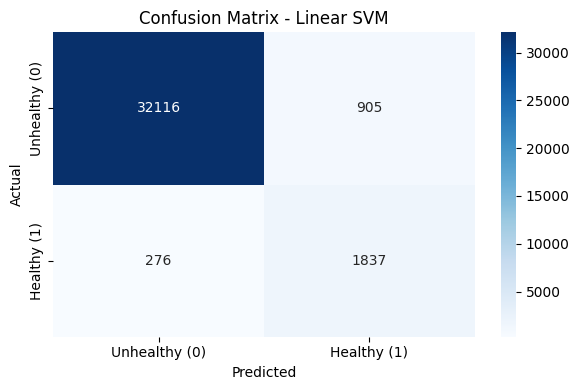

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, pred_svm)
labels = ["Unhealthy (0)", "Healthy (1)"]

plt.figure(figsize=(6,4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Linear SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/confusion_matrix_svm.png')  # Save to Drive
plt.show()


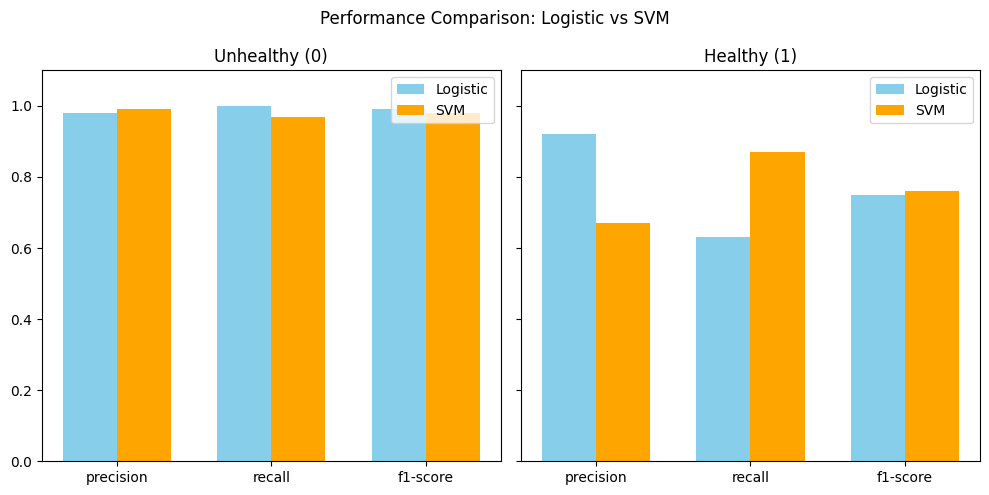

In [34]:

import matplotlib.pyplot as plt
import numpy as np

# Replace these with your real metrics
logistic_report = {
    '0': {'precision': 0.98, 'recall': 1.00, 'f1-score': 0.99},
    '1': {'precision': 0.92, 'recall': 0.63, 'f1-score': 0.75}
}

svm_report = {
    '0': {'precision': 0.99, 'recall': 0.97, 'f1-score': 0.98},
    '1': {'precision': 0.67, 'recall': 0.87, 'f1-score': 0.76}
}

metrics = ['precision', 'recall', 'f1-score']
classes = ['Unhealthy (0)', 'Healthy (1)']
x = np.arange(len(metrics))
width = 0.35

fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

for i, cls in enumerate(['0', '1']):
    logistic_vals = [logistic_report[cls][m] for m in metrics]
    svm_vals = [svm_report[cls][m] for m in metrics]

    axes[i].bar(x - width/2, logistic_vals, width, label='Logistic', color='skyblue')
    axes[i].bar(x + width/2, svm_vals, width, label='SVM', color='orange')
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(metrics)
    axes[i].set_ylim(0, 1.1)
    axes[i].set_title(classes[i])
    axes[i].legend()

fig.suptitle('Performance Comparison: Logistic vs SVM')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/model_comparison.png')  # Save to Drive
plt.show()
